In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm as LN
from astropy.table import Table,vstack,unique
from glob import glob

In [2]:
flist = glob('tempestgatables6/t*')
flist.sort()
t1 = Table()
for file in flist:
    t = Table.read(file,format='ascii')
    t1 = vstack([t1,t])
t1.sort(['fit','run'])
t1

run,r,d,v,beta,delta,gamma,theta,phi,xdist,vdist,fit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9383.0,43.61374254357911,29.2735412318405,44.116040062866915,334.2484736601968,60.9952677016822,85.57381207614115,95.96131175210802,86.8122778714343,3.4589727002094643,73.84840174410805,35.18249421326657
9405.0,43.998539539980406,27.023038678529737,43.8120994444161,336.5196664467771,59.46781535806207,92.76651263438575,107.75517357112395,142.12440323062157,4.227715992967164,67.21144395283775,35.29450244791347
9365.0,41.73135813808037,26.609221628301963,45.083141909651104,339.3219279609118,60.337943509813655,93.37627276684861,90.18785837791123,173.6693068346573,4.266032962413178,74.46844631595475,35.33534192406309
9275.0,43.31426905437151,28.96022077156354,42.138566547788514,340.2052090838103,62.60550351354072,95.17549852460203,103.83244597442412,82.02104081987316,3.519789676197328,86.36656827936525,35.688617256201866
9360.0,40.75466962486574,30.60569234361359,45.953604614297774,335.3564855815458,61.727552958498165,91.25595172671274,92.4984397681601,97.08528193777995,3.2872175080447086,91.83811833748099,35.796324706097344
9354.0,43.22776763145218,30.111881280485452,41.718512267774805,336.20174771868983,61.67994807871602,92.31444176764269,70.81724562253892,145.47410077848656,2.8691837071009267,81.62809323810052,35.880983430998945
...,...,...,...,...,...,...,...,...,...,...,...
9692.0,42.54879155197944,31.877791405651653,42.30085012866519,335.2064349204268,61.16329594207413,76.27408240377231,13.777088100444775,303.0072474386368,2.0686873409796553,56.89864779012742,45.63609637656531
9707.0,42.54879155197944,31.877791405651653,42.30085012866519,335.2064349204268,61.16329594207413,76.27408240377231,13.777088100444775,303.0072474386368,2.0686873409796553,56.89864779012742,45.63609637656531


In [3]:
t2 = unique(t1,keys=['r','d','v','beta','delta','theta','phi'],keep='last')
t2.sort('fit')
t2.reverse()
t2

run,r,d,v,beta,delta,gamma,theta,phi,xdist,vdist,fit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9767.0,41.20896594601709,32.55504895268364,44.355484958377744,334.5947852528503,62.5423332366987,68.66815191865587,23.68115588663965,317.11790783940467,1.7862617064580797,52.2430939784829,45.86611809352256
9752.0,42.54879155197944,31.877791405651653,42.30085012866519,335.2064349204268,61.16329594207413,76.27408240377231,13.777088100444775,303.0072474386368,2.0686873409796553,56.89864779012742,45.63609637656531
9716.0,43.714026116414715,33.462581662627024,41.30216801029026,337.0085251313237,60.33157396861314,68.8802725434283,34.90220460027347,297.9683731698649,1.9488168257660756,56.28222865657835,45.35506849233042
9732.0,40.96330617822708,33.13425578829785,42.82461149363411,334.941930291753,60.24167434734171,79.07751125017757,20.749873922416672,314.2031990134266,1.6921244915643425,88.84217555137165,45.27587413869116
9724.0,40.194311450331654,31.927811146934744,43.04979452962474,335.58098972086333,61.62259551000527,77.97056611077575,32.11284386320144,272.1445834882598,1.876712137992098,85.0527673405226,45.13046283083692
9524.0,40.44873211759527,30.094278488316213,42.210133032107336,334.92805654168984,61.263924070116346,72.8872970328581,28.721539905886814,268.8732887622809,2.406040677024639,67.86208958419664,45.038291121833694
...,...,...,...,...,...,...,...,...,...,...,...
9278.0,42.15047593013759,30.975994205358358,46.1535450941749,337.07690290316106,62.39632558977061,90.1263596917325,82.61627762657128,106.48715511628986,2.8602063964360633,82.54076443780095,36.02362442498084
9354.0,43.22776763145218,30.111881280485452,41.718512267774805,336.20174771868983,61.67994807871602,92.31444176764269,70.81724562253892,145.47410077848656,2.8691837071009267,81.62809323810052,35.880983430998945


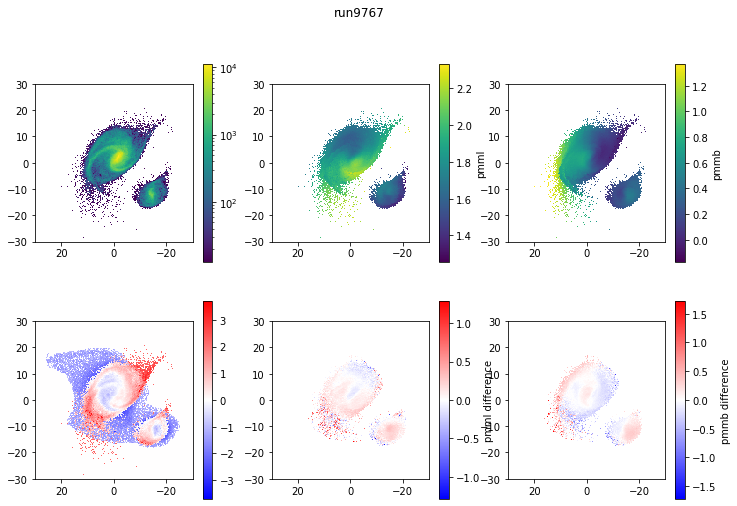

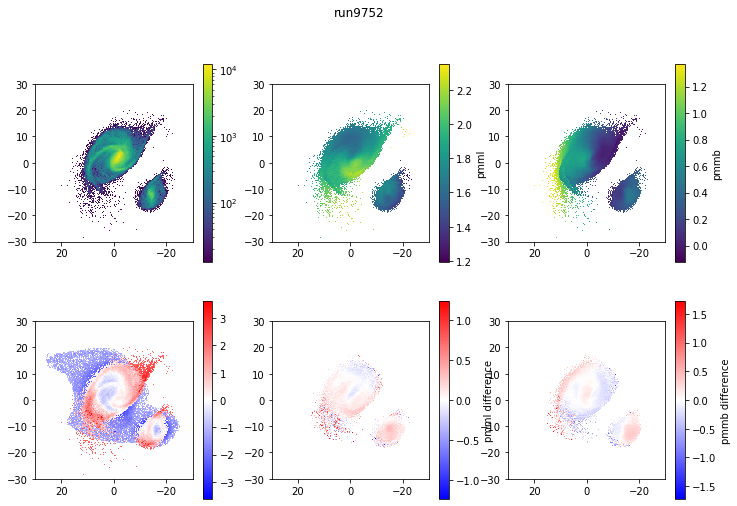

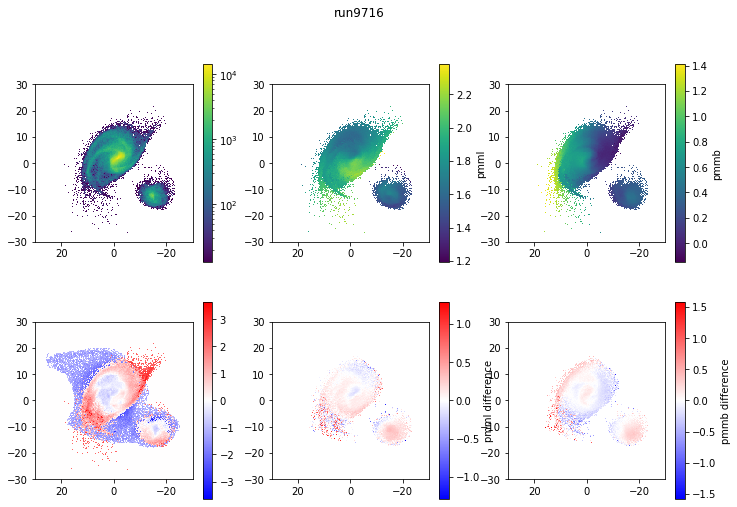

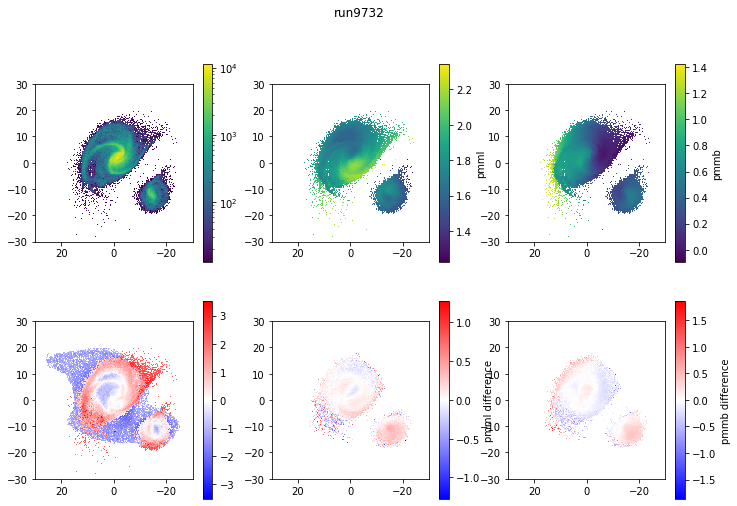

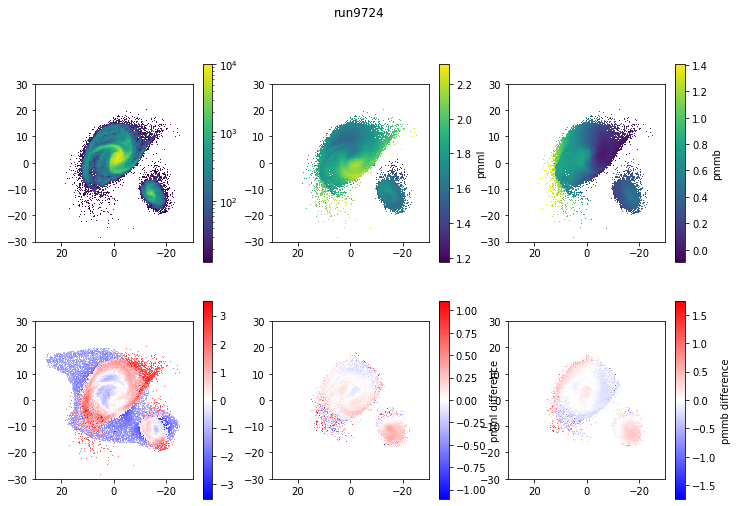

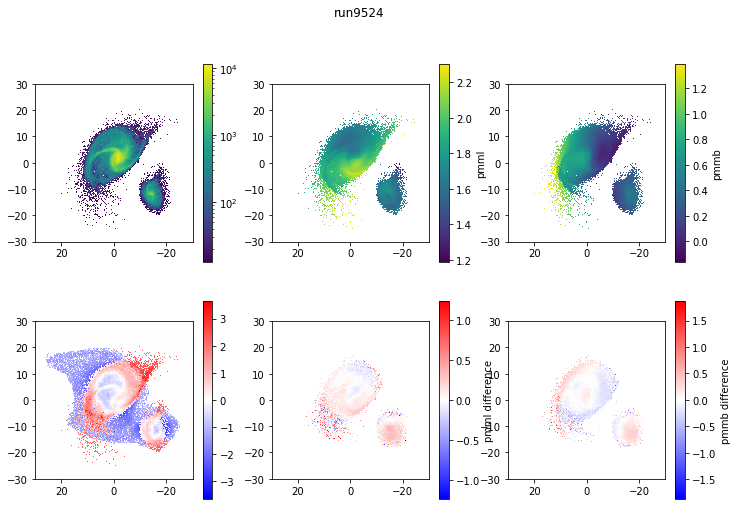

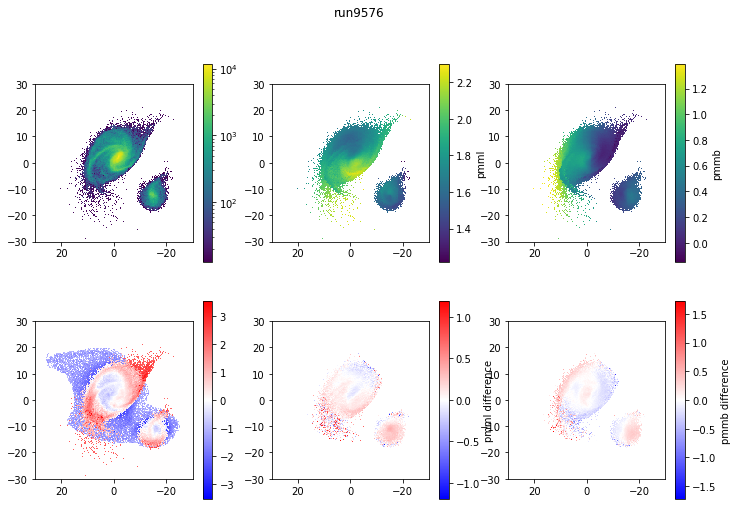

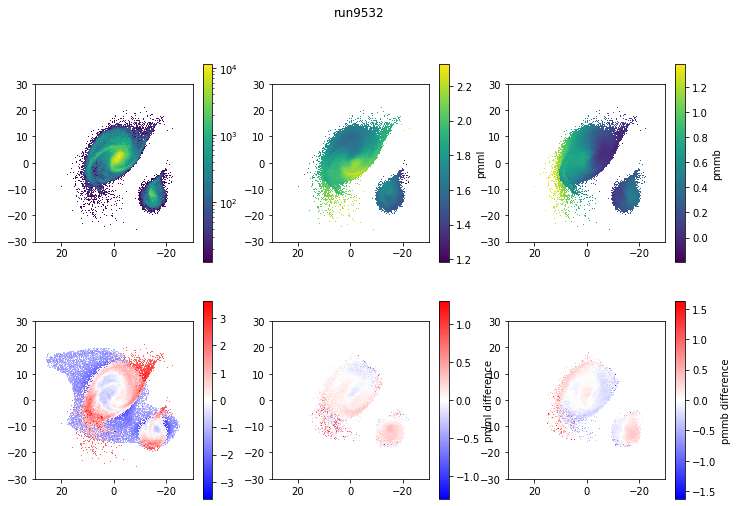

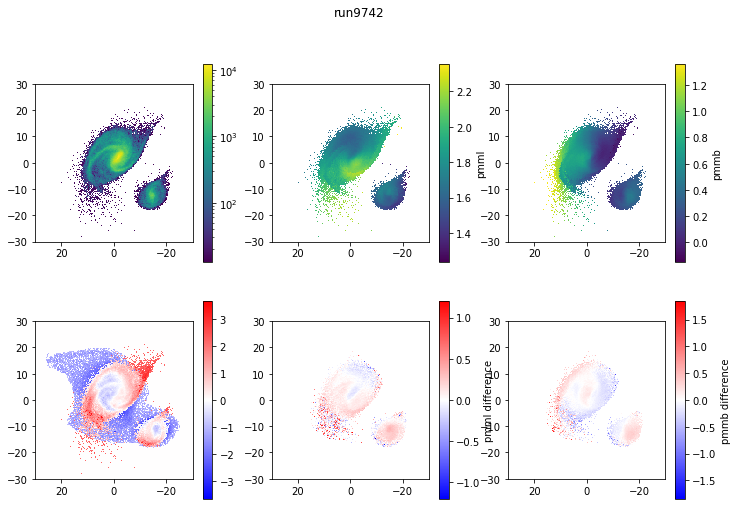

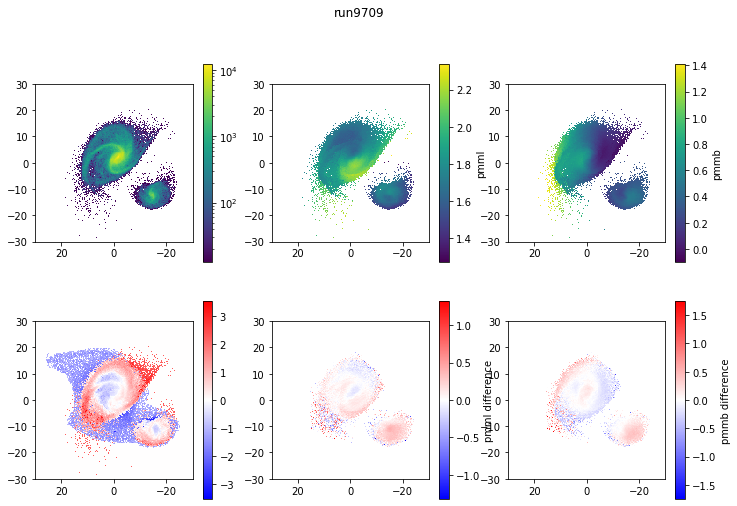

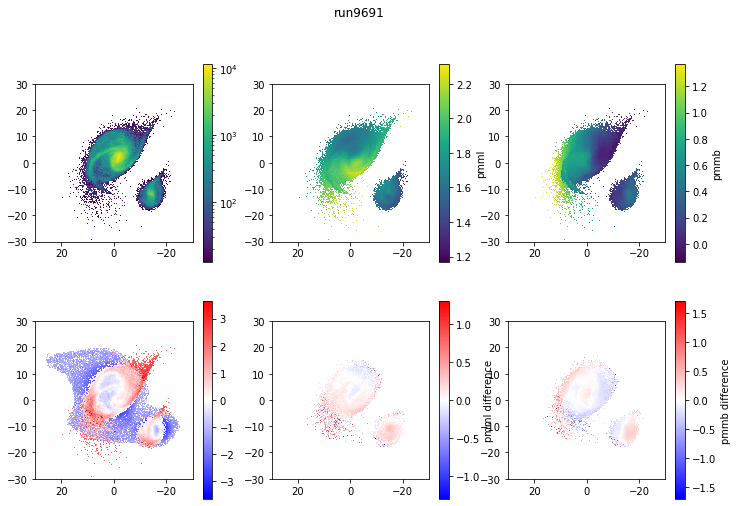

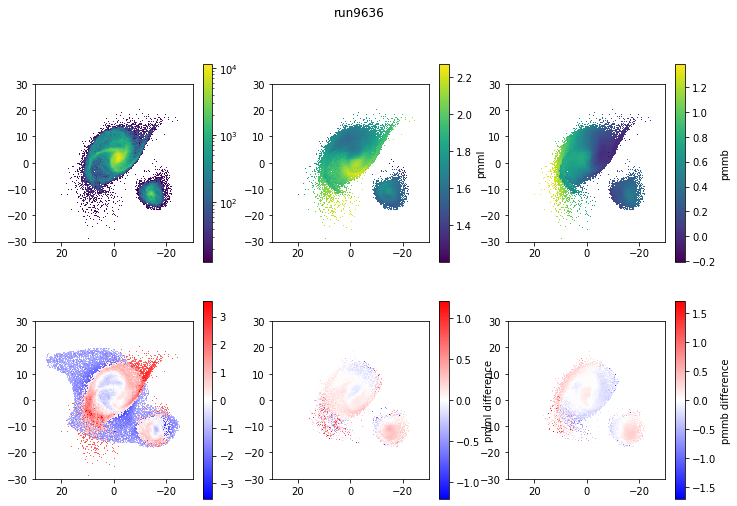

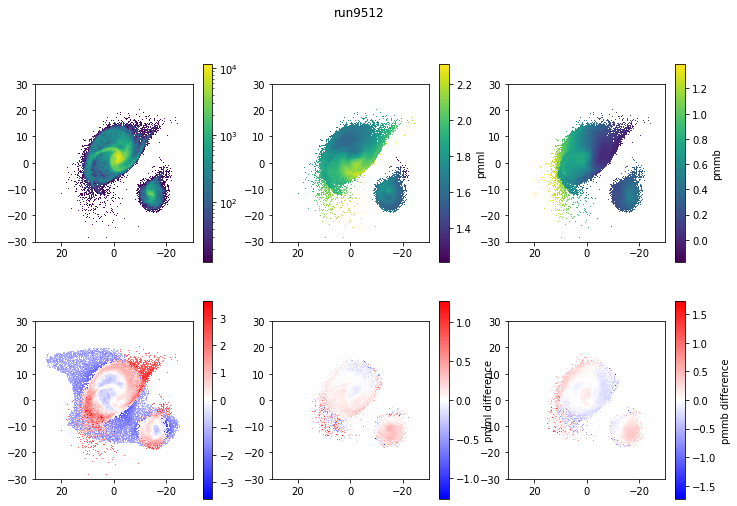

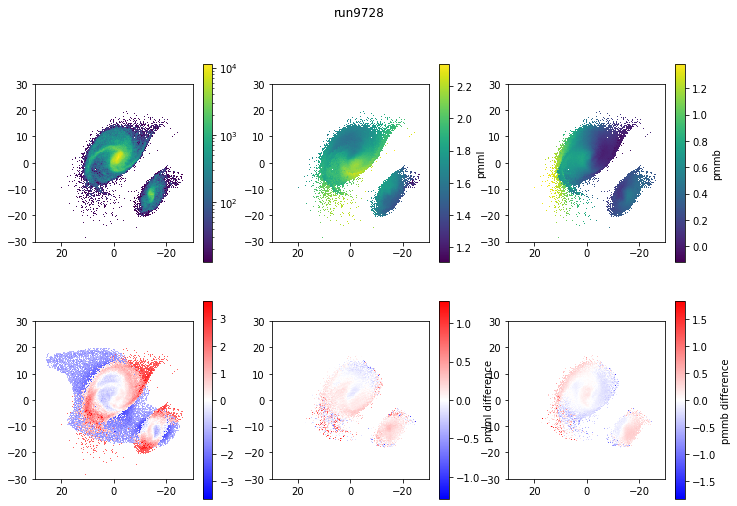

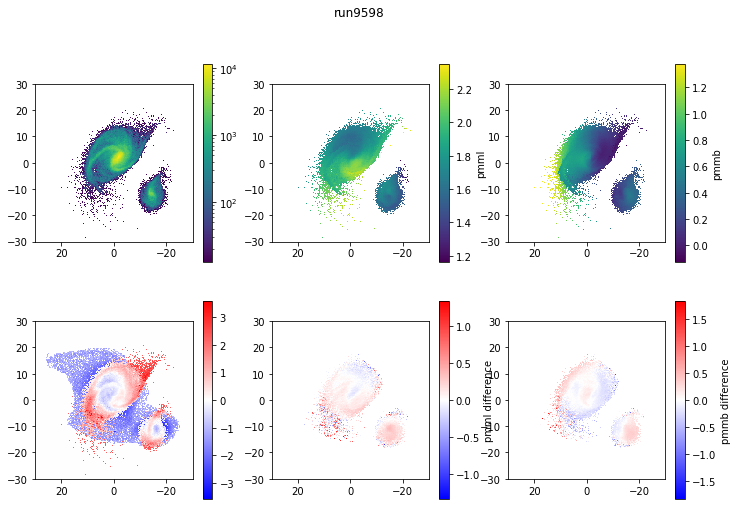

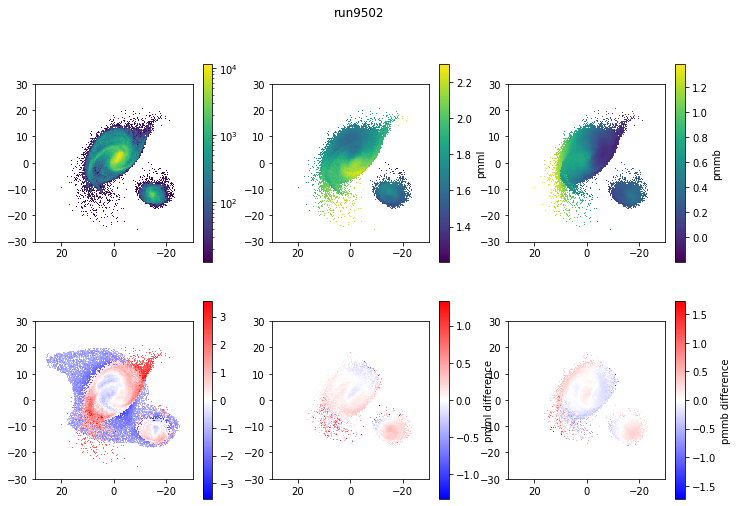

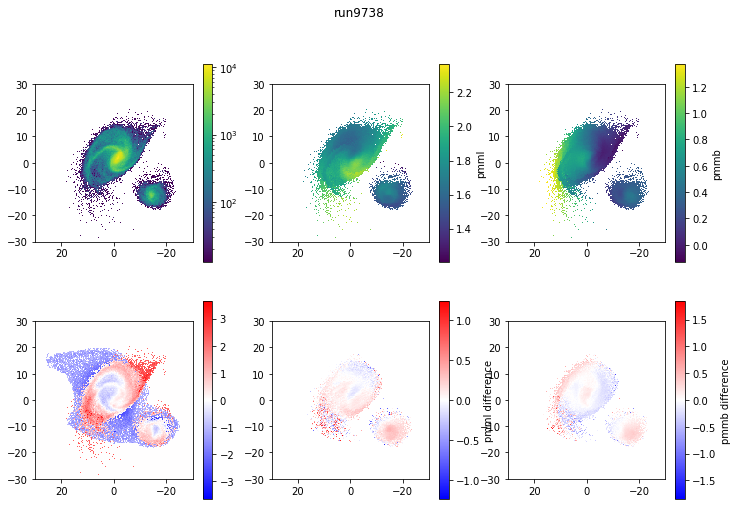

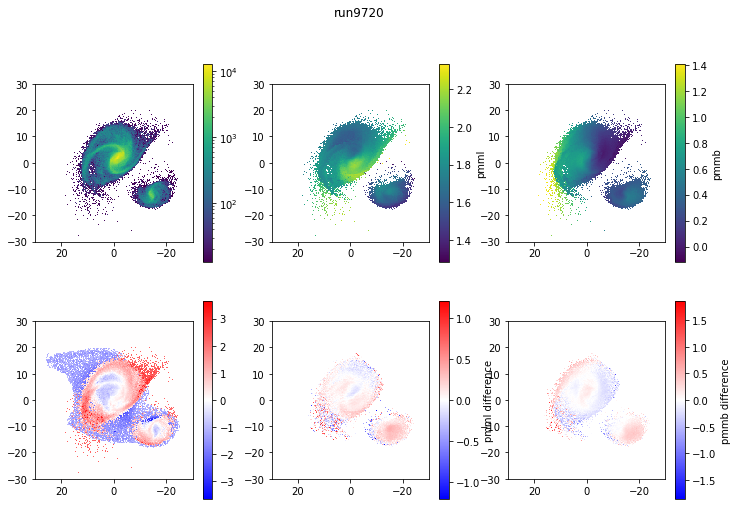

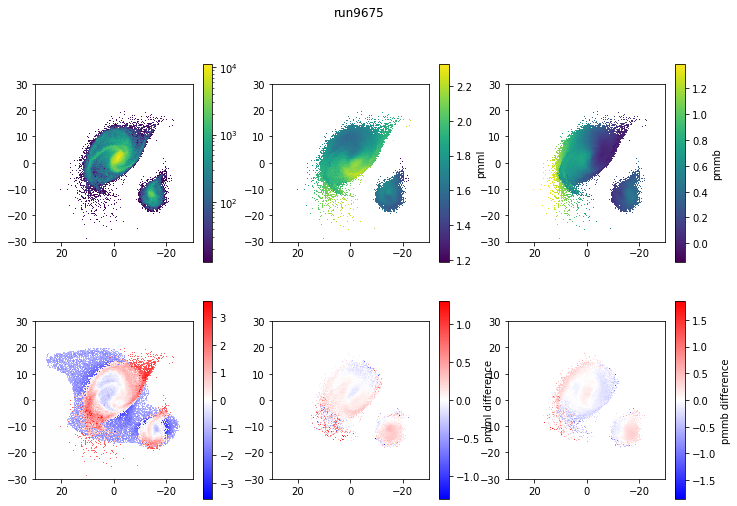

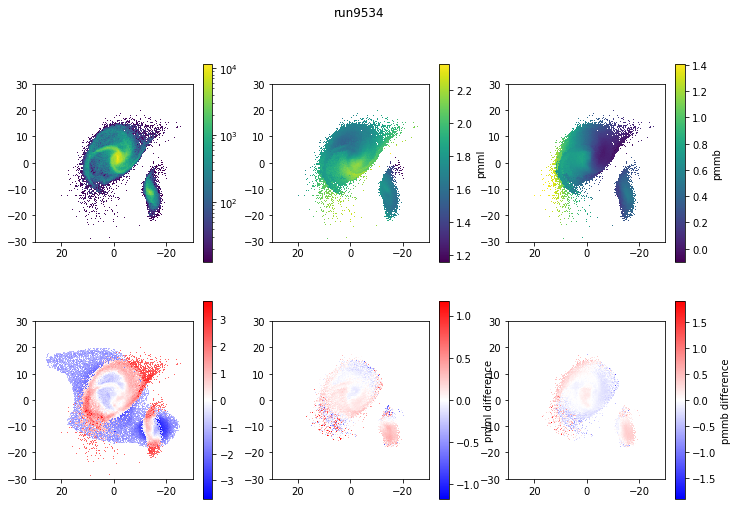

In [4]:
t3 = t2[:20]
extent = [-30,30,-30,30]
for line in t3:
    im1 = np.load('imfiles2/run{}.npy'.format(int(line['run'])))
    im4 = np.load('imfiles2/run{}.npy'.format(int(line['run'])))
    plt.figure(figsize=(12,8))
    plt.subplot(2,3,1)
    im1[(np.where(im1==0.1))] = 0
    plt.imshow(im1.T,origin='lower',extent=extent,norm=LN(),interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(2,3,2)
    im2 = np.load('imfiles2/run{}pmml.npy'.format(int(line['run'])))
    plt.imshow(im2.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar(label='pmml')
    plt.subplot(2,3,3)
    im3 = np.load('imfiles2/run{}pmmb.npy'.format(int(line['run'])))
    plt.imshow(im3.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb')
    plt.subplot(2,3,4)
    g1 = np.load('gaiamap.npy')
    im5 = np.log10(im4)-np.log10(g1)
    vv1 = np.max(np.abs(im5))
    plt.imshow(im5.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv1,vmax=vv1)
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(2,3,5)
    g2 = np.load('gaiapmml.npy'.format(int(line['run'])))
    im6 = im2-g2
    vv2 = np.max(np.abs(im6[np.where(~np.isnan(im6))]))
    plt.imshow(im6.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv2,vmax=vv2)
    plt.xlim((30,-30))
    plt.colorbar(label='pmml difference')
    plt.subplot(2,3,6)
    g3 = np.load('gaiapmmb.npy'.format(int(line['run'])))
    im7 = im3-g3
    vv3 = np.max(np.abs(im7[np.where(~np.isnan(im7))]))
    plt.imshow(im7.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb difference')
    plt.suptitle('run{}'.format(int(line['run'])))

In [5]:
t3

run,r,d,v,beta,delta,gamma,theta,phi,xdist,vdist,fit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9767.0,41.20896594601709,32.55504895268364,44.355484958377744,334.5947852528503,62.5423332366987,68.66815191865587,23.68115588663965,317.11790783940467,1.7862617064580797,52.2430939784829,45.86611809352256
9752.0,42.54879155197944,31.877791405651653,42.30085012866519,335.2064349204268,61.16329594207413,76.27408240377231,13.777088100444775,303.0072474386368,2.0686873409796553,56.89864779012742,45.63609637656531
9716.0,43.714026116414715,33.462581662627024,41.30216801029026,337.0085251313237,60.33157396861314,68.8802725434283,34.90220460027347,297.9683731698649,1.9488168257660756,56.28222865657835,45.35506849233042
9732.0,40.96330617822708,33.13425578829785,42.82461149363411,334.941930291753,60.24167434734171,79.07751125017757,20.749873922416672,314.2031990134266,1.6921244915643425,88.84217555137165,45.27587413869116
9724.0,40.194311450331654,31.927811146934744,43.04979452962474,335.58098972086333,61.62259551000527,77.97056611077575,32.11284386320144,272.1445834882598,1.876712137992098,85.0527673405226,45.13046283083692
9524.0,40.44873211759527,30.094278488316213,42.210133032107336,334.92805654168984,61.263924070116346,72.8872970328581,28.721539905886814,268.8732887622809,2.406040677024639,67.86208958419664,45.038291121833694
...,...,...,...,...,...,...,...,...,...,...,...
9728.0,41.50615831312656,32.50064403135726,41.85064457950835,333.16893003094685,63.18259536432287,75.0577534734543,1.2361363124169706,59.64443297422622,1.711352784880337,61.099304525949314,44.5865403072041
9598.0,42.49200909665026,31.31592105052993,41.23553052623519,334.2153604337093,62.405879140267324,73.7178907272427,19.167120054062256,272.8629464005346,2.126340253993976,58.74732551614381,44.552558994422355
